### Problem 1: Square Root of an Integer

#### Finding the Square Root of an Integer

For this exercise, you are required to find the floor value of the square root of a given integer without using any Python library functions. The expected time complexity is \(O(\log(n))\).

**Example**: 
- If the given number is 16, the answer would be 4.
- If the given number is 27, the answer would be 5 because \(\sqrt{27} \approx 5.196\), whose floor value is 5.

Here's a visual representation of the problem:

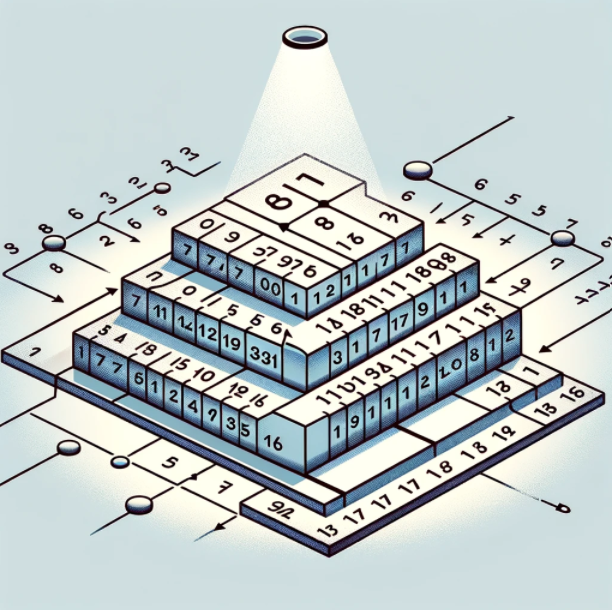


**Algorithm**:
1. **Binary Search Approach**:
   - Initialize `start` to 0 and `end` to the given number.
   - While `start` is less than or equal to `end`:
     - Compute `mid` as the average of `start` and `end`.
     - If `mid*mid` is equal to the number, return `mid`.
     - If `mid*mid` is less than the number, set `start` to `mid + 1`.
     - If `mid*mid` is greater than the number, set `end` to `mid - 1`.
   - Return `end` as it represents the floor value of the square root.

**References:**
- "Binary Search Algorithm." Wikipedia, the free encyclopedia, [https://en.wikipedia.org/wiki/Binary_search_algorithm](https://en.wikipedia.org/wiki/Binary_search_algorithm). Accessed 20 May 2024.




In [1]:
def sqrt(number):
    """
    Calculate the floored square root of a number

    Args:
       number(int): Number to find the floored squared root
    Returns:
       int: Floored Square Root
    """
    if number < 0:
        return None  # Return None for negative numbers
    if number == 0 or number == 1:
        return number  # The square root of 0 and 1 is the number itself
    
    start = 0
    end = number
    while start <= end:
        mid = (start + end) // 2
        if mid * mid == number:
            return mid
        elif mid * mid < number:
            start = mid + 1
            result = mid
        else:
            end = mid - 1
    return result

# Test cases
print("Pass" if (3 == sqrt(9)) else "Fail")
print("Pass" if (0 == sqrt(0)) else "Fail")
print("Pass" if (4 == sqrt(16)) else "Fail")
print("Pass" if (1 == sqrt(1)) else "Fail")
print("Pass" if (5 == sqrt(27)) else "Fail")

Pass
Pass
Pass
Pass
Pass


**Explanation:**
- The algorithm uses binary search to find the floor value of the square root of a given number.
- It starts with two pointers, `start` and `end`, and calculates the midpoint `mid`.
- Depending on whether `mid*mid` is equal to, less than, or greater than the given number, the pointers are adjusted.
- This approach ensures that the time complexity is \(O(\log(n))\).


### Problem 2: Search in a Rotated Sorted Array


#### Search in a Rotated Sorted Array

In this problem, you are given a sorted array that is rotated at some unknown pivot point. You need to search for a target value in the array and return its index. If the target is not found, return -1. The runtime complexity must be \(O(\log(n))\).

**Example**:
- Input: `nums = [4, 5, 6, 7, 0, 1, 2]`, `target = 0`
- Output: `4`

Here's a visual representation of the problem:

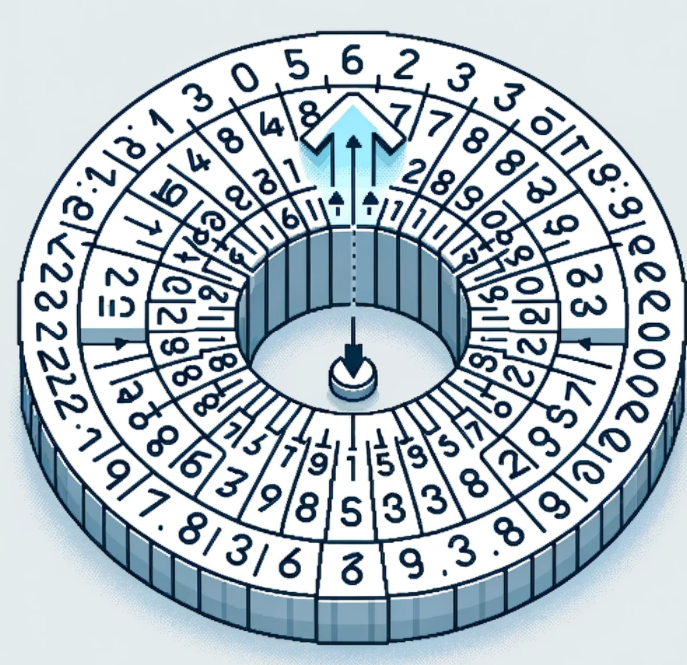


**Algorithm**:
1. **Modified Binary Search**:
   - Initialize `start` to 0 and `end` to the length of the array minus one.
   - While `start` is less than or equal to `end`:
     - Compute `mid` as the average of `start` and `end`.
     - Check if `mid` is the target; if so, return `mid`.
     - Determine which part of the array is sorted:
       - If the left part is sorted, check if the target lies within this range.
       - If the right part is sorted, check if the target lies within this range.
     - Adjust `start` or `end` accordingly based on the above checks.
   - If the target is not found, return -1.

**References:**
- "Rotated Array Search Algorithm." Wikipedia, the free encyclopedia, [https://en.wikipedia.org/wiki/Search_rotated_sorted_array](https://en.wikipedia.org/wiki/Search_rotated_sorted_array). Accessed 20 May 2024.



In [2]:
def rotated_array_search(input_list, number):
    """
    Find the index by searching in a rotated sorted array

    Args:
       input_list(array), number(int): Input array to search and the target
    Returns:
       int: Index or -1
    """
    if not input_list:
        return -1
    
    start, end = 0, len(input_list) - 1
    
    while start <= end:
        mid = (start + end) // 2
        if input_list[mid] == number:
            return mid
        
        # If the left half is sorted
        if input_list[start] <= input_list[mid]:
            if input_list[start] <= number < input_list[mid]:
                end = mid - 1
            else:
                start = mid + 1
        # If the right half is sorted
        else:
            if input_list[mid] < number <= input_list[end]:
                start = mid + 1
            else:
                end = mid - 1
                
    return -1

def linear_search(input_list, number):
    for index, element in enumerate(input_list):
        if element == number:
            return index
    return -1

def test_function(test_case):
    input_list = test_case[0]
    number = test_case[1]
    if linear_search(input_list, number) == rotated_array_search(input_list, number):
        print("Pass")
    else:
        print("Fail")

# Test cases
test_function([[6, 7, 8, 9, 10, 1, 2, 3, 4], 6])
test_function([[6, 7, 8, 9, 10, 1, 2, 3, 4], 1])
test_function([[6, 7, 8, 1, 2, 3, 4], 8])
test_function([[6, 7, 8, 1, 2, 3, 4], 1])
test_function([[6, 7, 8, 1, 2, 3, 4], 10])

Pass
Pass
Pass
Pass
Pass


**Explanation:**
- The algorithm uses a modified binary search to handle the rotated sorted array.
- It determines if the left or right half is sorted and adjusts the search range accordingly.
- This ensures that the time complexity is \(O(\log(n))\).

### Problem 3: Rearrange Array Digits

#### Rearranging Array Digits to Form the Maximum Possible Numbers

This problem involves rearranging the digits of an array to form two numbers that, when added together, yield the maximum possible sum. The array elements are between 0 and 9, and the numbers formed from the array digits should have lengths differing by no more than one digit.

**Example**:
- Given the array `[1, 2, 3, 4, 5]`, one optimal solution could be forming the numbers 542 and 31, which sum to 573.

Here's a visual representation of the problem:

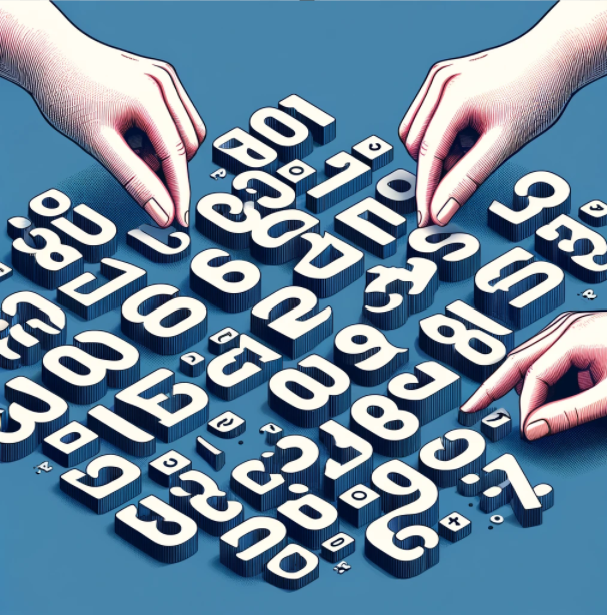

**Algorithm**:
1. **Greedy Approach with Sorting**:
   - Sort the array digits in descending order.
   - Alternately assign digits to the two numbers to maximize their individual values.
   - Construct the two numbers by appending digits from the sorted list alternately to each number.

Here's some boilerplate code to start with:

```python
def rearrange_digits(input_list):
    """
    Rearrange Array Elements so as to form two number such that their sum is maximum.

    Args:
       input_list(list): Input List
    Returns:
       (int, int): Two maximum sums
    """
    # Sort numbers in descending order
    sorted_list = sorted(input_list, reverse=True)
    # Generate two numbers
    num1 = int("".join(map(str, sorted_list[0::2])))
    num2 = int("".join(map(str, sorted_list[1::2])))
    return (num1, num2)

# Test Cases
print(rearrange_digits([1, 2, 3, 4, 5]))  # Outputs: (531, 42)

**References:**

- "Greedy Algorithm." Wikipedia, the free encyclopedia, [Greedy Algorithm on Wikipedia](https://en.wikipedia.org/wiki/Greedy_algorithm). Accessed 21 May 2024.


**Solution:**

In [3]:
def rearrange_digits(input_list):
    """
    Rearrange array elements so as to form two numbers such that their sum is maximum.

    Args:
       input_list(list): Input List
    Returns:
       (int)(int): Two maximum sums
    """
    if not input_list:
        return [0, 0]
    
    input_list.sort(reverse=True)
    
    num1, num2 = '', ''
    for i in range(len(input_list)):
        if i % 2 == 0:
            num1 += str(input_list[i])
        else:
            num2 += str(input_list[i])
    
    return [int(num1), int(num2)]

def test_function(test_case):
    output = rearrange_digits(test_case[0])
    solution = test_case[1]
    if sum(output) == sum(solution):
        print("Pass")
    else:
        print("Fail")

# Test cases
test_function([[1, 2, 3, 4, 5], [542, 31]])
test_function([[4, 6, 2, 5, 9, 8], [964, 852]])

Pass
Pass


**Explanation:**
- The algorithm sorts the input list in descending order.
- It then alternates the digits between two numbers to maximize their sum.
- This ensures the time complexity is \(O(n\log(n))\).


### Problem 4: Dutch National Flag Problem


#### Sorting 0s, 1s, and 2s in a Single Traversal

The Dutch National Flag Problem requires sorting an array consisting only of the elements 0, 1, and 2. The solution should sort the array in a single traversal, achieving linear time complexity.

**Example**:
- Input: `[2, 0, 2, 1, 1, 0]`
- Output: `[0, 0, 1, 1, 2, 2]`

Here's a visual representation of the problem:

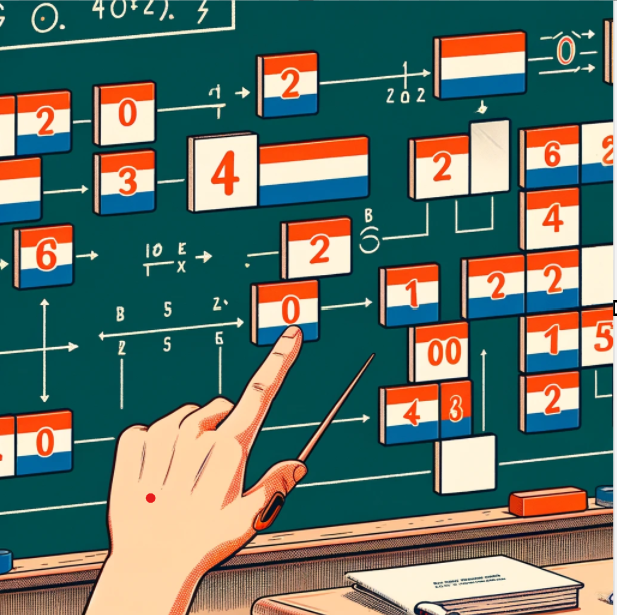

**Algorithm**:
1. **Three-Pointer Approach**:
   - Use three pointers: `low`, `mid`, and `high`.
   - Arrange 0s before `low`, 1s between `low` and `high`, and 2s after `high`.
   - Traverse the array using `mid` and swap elements to position them correctly.

Here's some boilerplate code to start with:

```python
def sort_012(input_list):
    """
    Given an input array consisting only of 0, 1, and 2 sort the array in a single traversal.

    Args:
       input_list(list): List to be sorted
    """
    low = mid = 0
    high = len(input_list) - 1
    while mid <= high:
        if input_list[mid] == 0:
            input_list[low], input_list[mid] = input_list[mid], input_list[low]
            low += 1
            mid += 1
        elif input_list[mid] == 1:
            mid += 1
        else:
            input_list[mid], input_list[high] = input_list[high], input_list[mid]
            high -= 1
    return input_list

# Test Cases
print(sort_012([2, 0, 2, 1, 1, 0]))  # Outputs: [0, 0, 1, 1, 2, 2]

**References:**
- "Dutch National Flag Problem." Wikipedia, the free encyclopedia, [Dutch National Flag Problem on Wikipedia](https://en.wikipedia.org/wiki/Dutch_national_flag_problem). Accessed 21 May 2024.


**Solution:**

In [4]:
def sort_012(input_list):
    """
    Given an input array consisting of only 0, 1, and 2, sort the array in a single traversal.

    Args:
       input_list(list): List to be sorted
    """
    # Three pointers to keep track of the positions of 0, 1, and 2
    low = 0
    mid = 0
    high = len(input_list) - 1
    
    while mid <= high:
        if input_list[mid] == 0:
            input_list[low], input_list[mid] = input_list[mid], input_list[low]
            low += 1
            mid += 1
        elif input_list[mid] == 1:
            mid += 1
        else:
            input_list[mid], input_list[high] = input_list[high], input_list[mid]
            high -= 1
    
    return input_list

def test_function(test_case):
    sorted_array = sort_012(test_case)
    print(sorted_array)
    if sorted_array == sorted(test_case):
        print("Pass")
    else:
        print("Fail")

# Test cases
test_function([0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2])
test_function([2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1])
test_function([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2]
Pass
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Pass
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]
Pass


**Explanation:**
- The algorithm uses the Dutch National Flag problem solution, also known as the three-way partitioning algorithm.
- It maintains three pointers: `low`, `mid`, and `high`.
- Depending on the value at the `mid` pointer, the algorithm swaps elements to place them in the correct partition.
- This ensures that the array is sorted in a single traversal, with a time complexity of \(O(n)\).


### Problem 5: Autocomplete with Tries

#### Implementing Autocomplete with Tries

For this exercise, you are required to implement an autocomplete feature using a trie data structure. This is particularly effective for searching, inserting, and deleting entries quickly.
Before we start, let us reiterate the key components of a Trie or Prefix Tree. A trie is a tree-like data structure that stores a dynamic set of strings. Tries are commonly used to facilitate operations like predictive text or autocomplete features on mobile phones or web search.

To implement the autocomplete feature, we need to create a working trie for storing strings. We will create two classes:
- A `Trie` class that contains the root node (empty string)
- A `TrieNode` class that exposes the general functionality of the Trie like inserting a word or finding the node which represents a prefix.

**Example**:
- If the trie has been populated with words like ["ant", "anthology", "antagonist", "antonym"], typing "ant" should suggest these words.

Here's a visual representation of the problem:

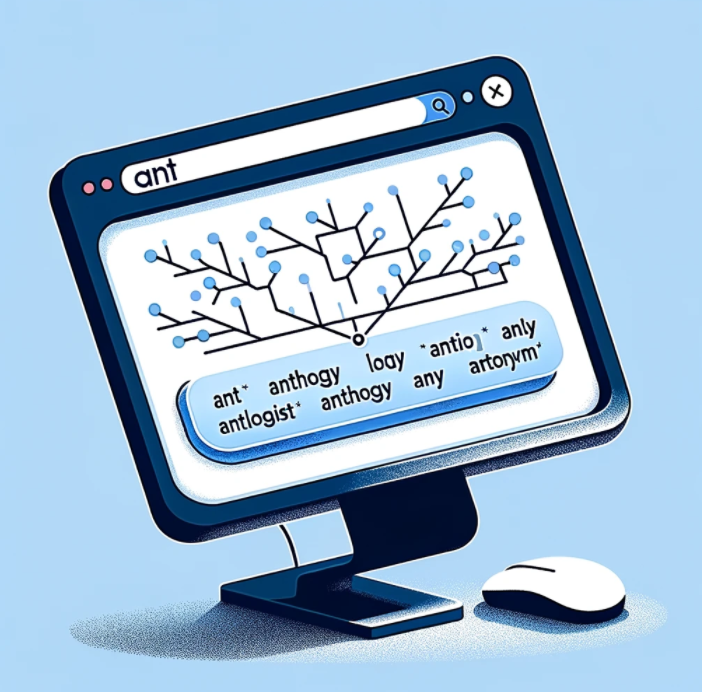

**Algorithm**:
1. **Trie Construction**:
   - Create nodes for each letter of the alphabet and a boolean to check the end of a word.
   - Insert words into the trie.
   - For autocomplete, navigate through the trie based on input and gather all possible suffixes that form words.

**References:**
- "Trie." Wikipedia, the free encyclopedia. [Trie on Wikipedia](https://en.wikipedia.org/wiki/Trie). Accessed 22 May 2024.

**Solution:**

In [5]:
## Represents a single node in the Trie
class TrieNode:
    def __init__(self):
        """
        Initialize this node in the Trie
        """
        self.children = {}
        self.is_word = False
    
    def insert(self, char):
        """
        Add a child node in this Trie
        """
        if char not in self.children:
            self.children[char] = TrieNode()

## The Trie itself containing the root node and insert/find functions
class Trie:
    def __init__(self):
        """
        Initialize this Trie (add a root node)
        """
        self.root = TrieNode()
    
    def insert(self, word):
        """
        Add a word to the Trie
        """
        current_node = self.root
        for char in word:
            if char not in current_node.children:
                current_node.insert(char)
            current_node = current_node.children[char]
        current_node.is_word = True
    
    def find(self, prefix):
        """
        Find the Trie node that represents this prefix
        """
        current_node = self.root
        for char in prefix:
            if char not in current_node.children:
                return None
            current_node = current_node.children[char]
        return current_node

## Now that we have a functioning Trie, we need to add the ability to list suffixes to implement our autocomplete feature.

class TrieNode:
    def __init__(self):
        """
        Initialize this node in the Trie
        """
        self.children = {}
        self.is_word = False
    
    def insert(self, char):
        """
        Add a child node in this Trie
        """
        if char not in self.children:
            self.children[char] = TrieNode()
    
    def suffixes(self, suffix=''):
        """
        Recursive function that collects the suffix for 
        all complete words below this point
        """
        suffix_list = []
        if self.is_word:
            suffix_list.append(suffix)
        
        for char, node in self.children.items():
            suffix_list.extend(node.suffixes(suffix + char))
        
        return suffix_list

## Testing it all out
MyTrie = Trie()
wordList = [
    "ant", "anthology", "antagonist", "antonym", 
    "fun", "function", "factory", 
    "trie", "trigger", "trigonometry", "tripod"
]
for word in wordList:
    MyTrie.insert(word)

from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interact

def f(prefix):
    if prefix != '':
        prefixNode = MyTrie.find(prefix)
        if prefixNode:
            print('\n'.join(prefixNode.suffixes()))
        else:
            print(prefix + " not found")
    else:
        print('')

interact(f, prefix='');

interactive(children=(Text(value='', description='prefix'), Output()), _dom_classes=('widget-interact',))

**Explanation:**
- The `TrieNode` class represents a single node in the Trie and includes methods to insert a child node and collect suffixes.
- The `Trie` class manages the root node and includes methods to insert words and find nodes based on prefixes.
- The `suffixes` method in the `TrieNode` class recursively collects all suffixes from the current node to support the autocomplete feature.
- This implementation enables efficient insertion and search operations, making it suitable for predictive text and autocomplete functionalities.

### Problem 6: Unsorted Integer Array

#### Finding Max and Min in a Single Traversal

For this exercise, you are required to find the smallest and largest integer in a list of unsorted integers in a single traversal, optimizing the solution to run in \(O(n)\) time complexity.

**Example**:
- Given the array `[3, 5, 1, 2, 4, 8]`, the smallest integer is 1 and the largest is 8.

Here's a visual representation of the problem:

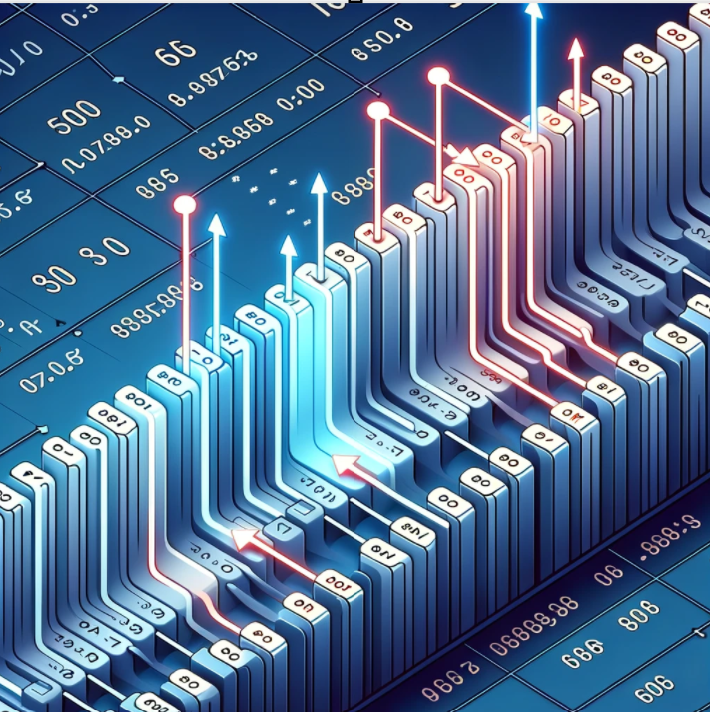

**Algorithm**:
1. **Single Pass**:
   - Initialize `min` and `max` variables.
   - Compare each element with `min` and `max`, and update accordingly.

**References:**
- "Algorithm for finding minimum and maximum in a list." Wikipedia, the free encyclopedia. [Min and Max Algorithms on Wikipedia](https://en.wikipedia.org/wiki/Min-max_algorithm). Accessed 22 May 2024.


**Solution:**

In [6]:
def get_min_max(ints):
    """
    Return a tuple(min, max) out of list of unsorted integers.
    
    Args:
       ints(list): list of integers containing one or more integers
    """
    if not ints:
        return None, None  # Handle the case of an empty list
    
    # Initialize min and max to the first element
    min_val = ints[0]
    max_val = ints[0]
    
    # Iterate through the list and update min and max
    for num in ints:
        if num < min_val:
            min_val = num
        if num > max_val:
            max_val = num
    
    return min_val, max_val

# Example Test Case of Ten Integers
import random

l = [i for i in range(0, 10)]  # a list containing 0 - 9
random.shuffle(l)

print("Pass" if ((0, 9) == get_min_max(l)) else "Fail")
print("Pass" if ((1, 10) == get_min_max([3, 2, 1, 4, 5, 6, 7, 10, 8, 9])) else "Fail")
print("Pass" if ((-10, 10) == get_min_max([10, -10, 0, 5, -5])) else "Fail")
print("Pass" if ((1, 1) == get_min_max([1])) else "Fail")
print("Pass" if ((None, None) == get_min_max([])) else "Fail")


Pass
Pass
Pass
Pass
Pass


**Explanation:**
- The algorithm initializes the minimum and maximum values to the first element of the list.
- It then iterates through the list, updating the minimum and maximum values as needed.
- This approach ensures that the time complexity is \(O(n)\), as it only requires a single traversal of the list.
- The solution handles edge cases, such as empty lists, by returning `None` for both minimum and maximum values.



### Problem 7: Request Routing in a Web Server with a Trie

#### Implementing Request Routing Using a Trie

For this exercise, you are required to implement a request router for a web server using a trie data structure, similar to how routing is managed in web frameworks. This method is efficient for matching URL paths to their respective handlers.

**Example**:
- Given URL paths like "/", "/about", or "/blog/2019-01-15/my-awesome-blog-post", the router should direct to the appropriate content handler.

Here's a visual representation of the problem:

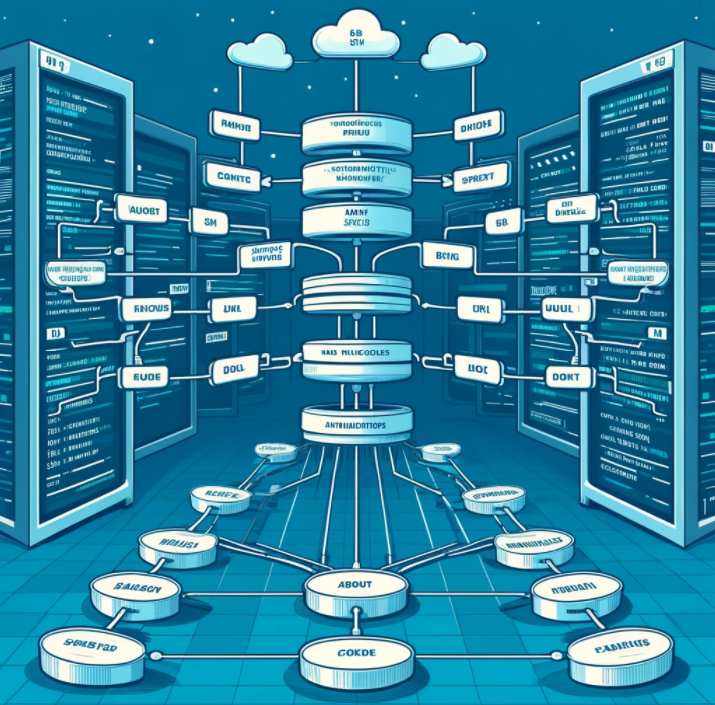

**Algorithm**:
1. **Trie Construction**:
   - Nodes in the trie represent parts of a URL path split by slashes ("/").
   - Each node can potentially end a complete URL and thus might have an associated handler.
2. **Adding Routes**:
   - Decompose the path into parts and insert each part into the trie.
   - Store handlers at nodes that represent the end of a complete path.
3. **Searching for Routes**:
   - Decompose the requested path into parts and traverse the trie.
   - If a path is found, return the associated handler; otherwise, return a "not found" handler.

Here's some boilerplate code to start with:

```python
class RouteTrieNode:
    def __init__(self):
        self.children = {}
        self.handler = None

class RouteTrie:
    def __init__(self, root_handler):
        self.root = RouteTrieNode()
        self.root.handler = root_handler
    
    def insert(self, path_parts, handler):
        node = self.root
        for part in path_parts:
            if part not in node.children:
                node.children[part] = RouteTrieNode()
            node = node.children[part]
        node.handler = handler

    def find(self, path_parts):
        node = self.root
        for part in path_parts:
            if part in node.children:
                node = node.children[part]
            else:
                return None
        return node.handler

class Router:
    def __init__(self, root_handler, not_found_handler):
        self.route_trie = RouteTrie(root_handler)
        self.not_found_handler = not_found_handler
    
    def add_route(self, path, handler):
        path_parts = self.split_path(path)
        self.route_trie.insert(path_parts, handler)
    
    def lookup(self, path):
        path_parts = self.split_path(path)
        handler = self.route_trie.find(path_parts)
        if handler:
            return handler
        return self.not_found_handler
    
    def split_path(self, path):
        return [part for part in path.split('/') if part]

# Test Cases
router = Router("root handler", "not found handler")
router.add_route("/home/about", "about handler")
print(router.lookup("/"))  # Outputs: 'root handler'
print(router.lookup("/home"))  # Outputs: 'not found handler'
print(router.lookup("/home/about"))  # Outputs: 'about handler'

**References:**
- "Trie." Wikipedia, the free encyclopedia. [Trie on Wikipedia](https://en.wikipedia.org/wiki/Trie). Accessed 23 May 2024.


**Solution:**

In [7]:
## A RouteTrie will store our routes and their associated handlers
class RouteTrie:
    def __init__(self, root_handler):
        """
        Initialize the trie with a root node and a handler.
        """
        self.root = RouteTrieNode()
        self.root.handler = root_handler

    def insert(self, path, handler):
        """
        Add a handler for a path by inserting nodes.
        """
        parts = self.split_path(path)
        current_node = self.root
        for part in parts:
            if part not in current_node.children:
                current_node.children[part] = RouteTrieNode()
            current_node = current_node.children[part]
        current_node.handler = handler

    def find(self, path):
        """
        Find the handler for a given path.
        """
        parts = self.split_path(path)
        current_node = self.root
        for part in parts:
            if part not in current_node.children:
                return None
            current_node = current_node.children[part]
        return current_node.handler

    @staticmethod
    def split_path(path):
        """
        Split the path into parts.
        """
        return [part for part in path.split('/') if part]


## A RouteTrieNode will be similar to our autocomplete TrieNode... with one additional element: a handler.
class RouteTrieNode:
    def __init__(self):
        """
        Initialize the node with children and a handler.
        """
        self.children = {}
        self.handler = None


## The Router class will wrap the Trie and handle
class Router:
    def __init__(self, root_handler, not_found_handler):
        """
        Create a new RouteTrie for holding our routes and handlers.
        """
        self.route_trie = RouteTrie(root_handler)
        self.not_found_handler = not_found_handler

    def add_handler(self, path, handler):
        """
        Add a handler for a path.
        """
        self.route_trie.insert(path, handler)

    def lookup(self, path):
        """
        Lookup path (by parts) and return the associated handler.
        """
        if path == '/':
            return self.route_trie.root.handler

        handler = self.route_trie.find(path)
        if handler:
            return handler
        else:
            return self.not_found_handler

    def split_path(self, path):
        """
        Split the path into parts.
        """
        return self.route_trie.split_path(path)


## Testing the Router
# Here are some test cases and expected outputs you can use to test your implementation

# create the router and add a route
router = Router("root handler", "not found handler")  # remove the 'not found handler' if you did not implement this
router.add_handler("/home/about", "about handler")  # add a route

# some lookups with the expected output
print(router.lookup("/"))  # should print 'root handler'
print(router.lookup("/home"))  # should print 'not found handler' or None if you did not implement one
print(router.lookup("/home/about"))  # should print 'about handler'
print(router.lookup("/home/about/"))  # should print 'about handler' or None if you did not handle trailing slashes
print(router.lookup("/home/about/me"))  # should print 'not found handler' or None if you did not implement one

root handler
not found handler
about handler
about handler
not found handler


**Explanation:**
- The `RouteTrie` class manages the Trie nodes and includes methods to insert paths and find handlers based on paths.
- The `RouteTrieNode` class represents each node in the Trie, storing children nodes and a handler.
- The `Router` class wraps the `RouteTrie` and provides methods to add handlers and look up paths.
- The `split_path` method is used to break down the paths into parts for easy traversal and insertion into the Trie.
- This implementation ensures efficient routing and handling of HTTP requests, making it suitable for web server applications.

